In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']

In [10]:
X_train, X_test = X_train/255 , X_test/255  

### Build the model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = "relu" ),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(10, activation="softmax")
])

### Compile the model

In [18]:
model.compile(optimizer='adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5082 - accuracy: 0.8216
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3830 - accuracy: 0.8626
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3416 - accuracy: 0.8745
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2998 - accuracy: 0.8901


### Evaluate the model

In [19]:
test_loss, test_acc = model.evaluate(X_train, y_train, verbose=2)
print("\n Test Accuracy", test_acc)

1875/1875 - 2s - loss: 0.2766 - accuracy: 0.8989 - 2s/epoch - 843us/step

 Test Accuracy 0.8989166617393494


In [20]:
predictions = model.predict(X_train)

1875/1875 [==============================] - 2s 801us/step


### Display result

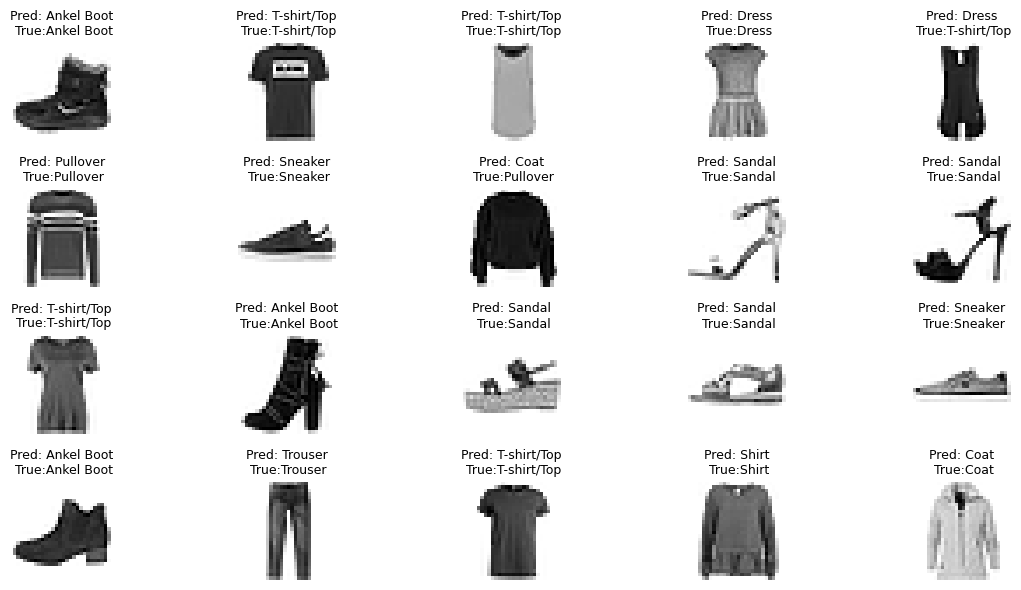

In [22]:
plt.figure(figsize=(12,6))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_train[i]]
    plt.title(f"Pred: {predicted_label}\n True:{true_label}",fontsize = 9)
    plt.axis('off')
plt.tight_layout()
plt.show()

